<a href="https://colab.research.google.com/github/athibhash5/myworkouts/blob/main/clusteringExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clustering

In [1]:
#1.kmeans

In [2]:
import pandas as pd
data=pd.read_csv('/content/kmeansData.csv')

In [3]:
data.shape

(9, 2)

In [4]:
data.head()

,1.42,0.67
0,2.05,1.70
1,3.20,3.52
2,3.70,0.15
3,4.70,1.45
4,6.17,2.67


In [5]:
from sklearn.cluster import KMeans
wcss=[] # creating empty list wcss,where we need to append the inertia according to k values (i ->1 to 10)
for i in range (1,10):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
wcss
#now we need to plot K vs inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[80.06762222222221,
 20.647334999999998,
 13.473358333333334,
 8.554825,
 5.3867,
 3.06925,
 1.7242499999999998,
 0.7779999999999998,
 0.0]

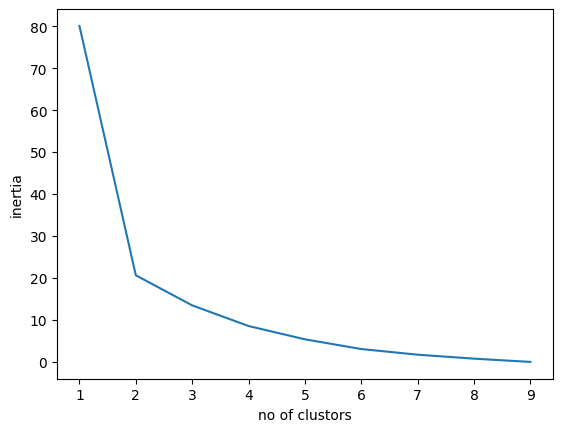

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),wcss)
plt.xlabel('no of clustors')
plt.ylabel('inertia')
plt.show()

In [7]:
#here elbow point at k=2

In [8]:
kmeans=KMeans(n_clusters=2,init="k-means++",random_state=0)
kmeans.fit(data)
y=kmeans.predict(data)
data['cluster']=y
data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,1.42,0.67,cluster
0,2.05,1.70,1
1,3.20,3.52,1
2,3.70,0.15,1
3,4.70,1.45,1
4,6.17,2.67,0
5,7.80,3.70,0
6,8.74,4.52,0
7,9.25,2.15,0
8,9.70,3.45,0


In [9]:
from  sklearn import metrics
myClust=KMeans(n_clusters=2,init='k-means++')
clustmodel=myClust.fit(data)
labels=clustmodel.labels_
labels  # labels is clustr names



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

The silhouette score is a metric that measures how well-defined the clusters are in the data. The score ranges from -1 to 1, where a higher silhouette score indicates better-defined clusters.

In [13]:
metrics.silhouette_score(data,labels,metric='euclidean')
s=[]
for i in range (2,6): # giving 2 to 5 no of clusters and check the silhouettte score.here heighest score for i=2
  myClust=KMeans(n_clusters=i,init='k-means++')
  clustmodel=myClust.fit(data)
  labels=clustmodel.labels_
  v=metrics.silhouette_score(data,labels,metric='euclidean')
  print(v)
  s.append(v) #store the score in list s
s


0.5474782124413857
0.38091665301496497
0.2827668016170306
0.2606959343326083


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.5474782124413857,
 0.38091665301496497,
 0.2827668016170306,
 0.2606959343326083]

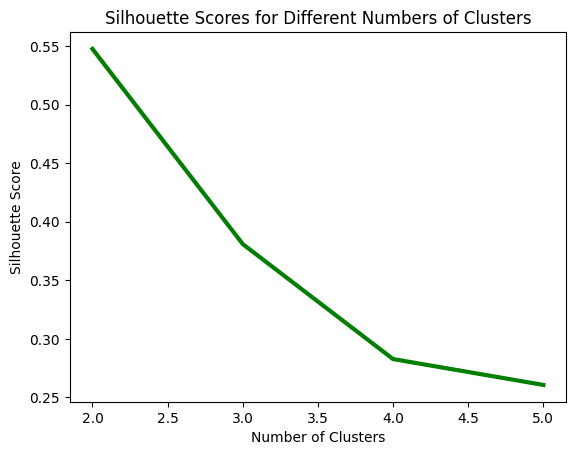

In [15]:
plt.plot(range(2,6),s,linewidth=3,color='g')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##Agglomerative clustering

Agglomerative clustering is a hierarchical clustering technique that starts with each data point as a separate cluster and then merges the closest clusters iteratively until only a single cluster remains. One common way to visualize the hierarchy and the process of merging clusters is by using a dendrogram.

In [16]:
import pandas as pd
data=pd.read_csv('/content/Wholesale customers data.csv')

In [17]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [20]:
from sklearn.preprocessing import normalize
data_scaled=normalize(data) #Normalization typically involves transforming the data so that it conforms to a standard scale.
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


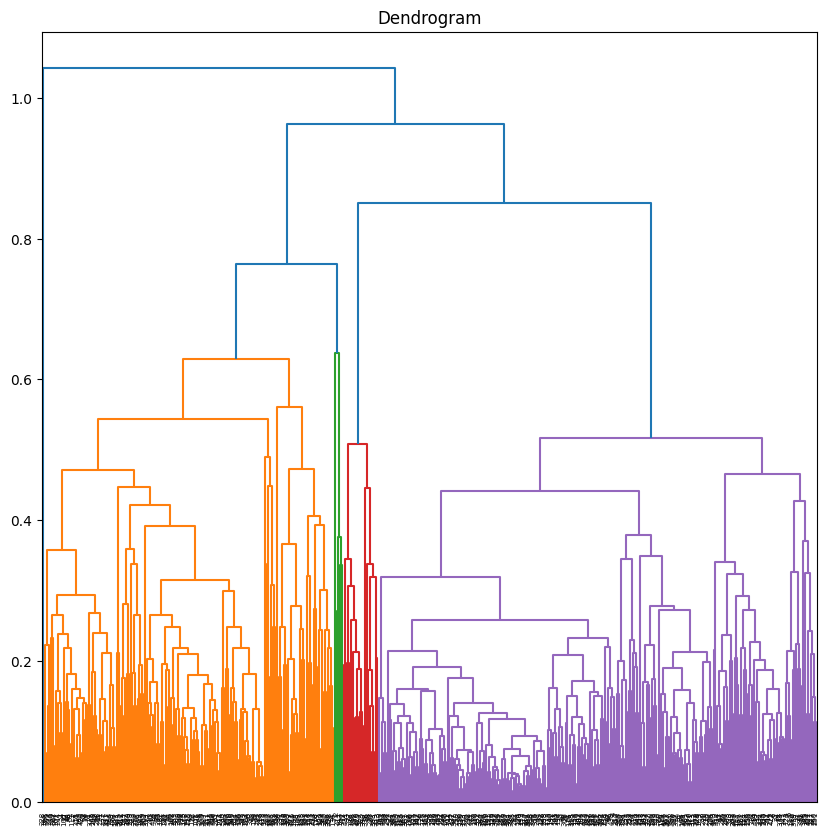

In [21]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
dend=shc.dendrogram(shc.linkage(data_scaled,method='average'))


In [ ]:
#here red & green clusters are very small and eliminated, so consider no of clusters as 2

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')


In hierarchical clustering, the **linkage** criterion is a measure of dissimilarity between sets of observations. It determines the distance between clusters when they are merged. here choose 'complete'linkage.others are 'ward','average'.

**Complete** Linkage ('complete'): Measures the maximum distance between all pairs of observations in two clusters. It tends to produce clusters with more uniform sizes but may be sensitive to outliers.

**Average** Linkage ('average'): Computes the average distance between all pairs of observations in two clusters. It is less sensitive to outliers compared to complete linkage.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'Grocery (Scaled)')

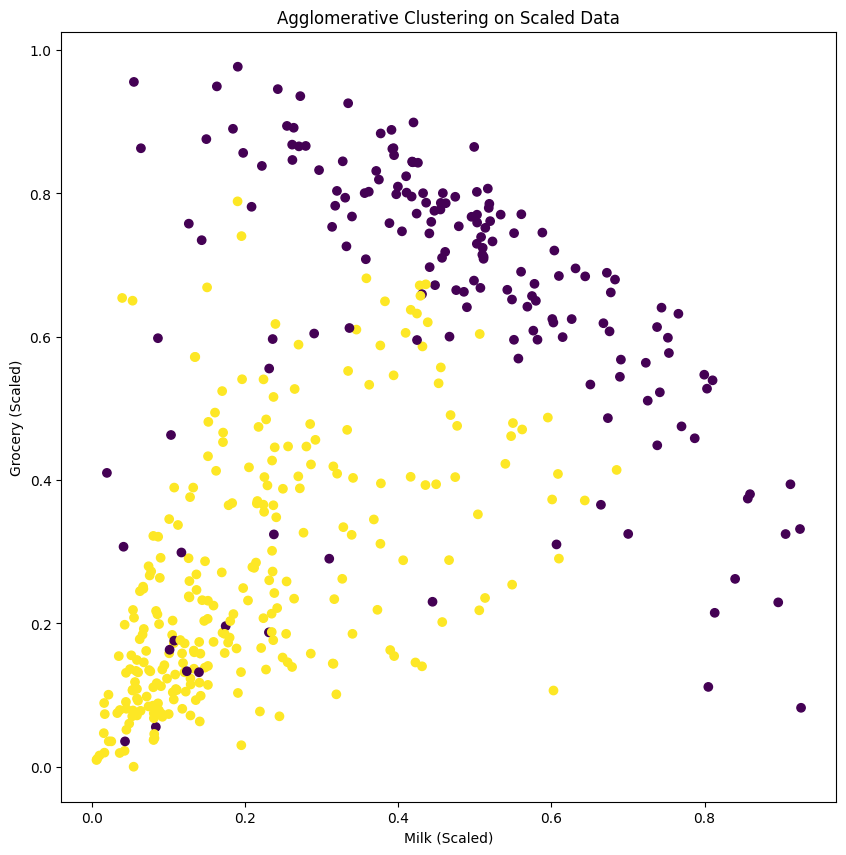

In [25]:
y=cluster.fit_predict(data_scaled)
cluster.labels_
plt.figure(figsize=(10,10))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=y)
plt.title('Agglomerative Clustering on Scaled Data')
plt.xlabel('Milk (Scaled)')
plt.ylabel('Grocery (Scaled)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'Grocery (Scaled)')

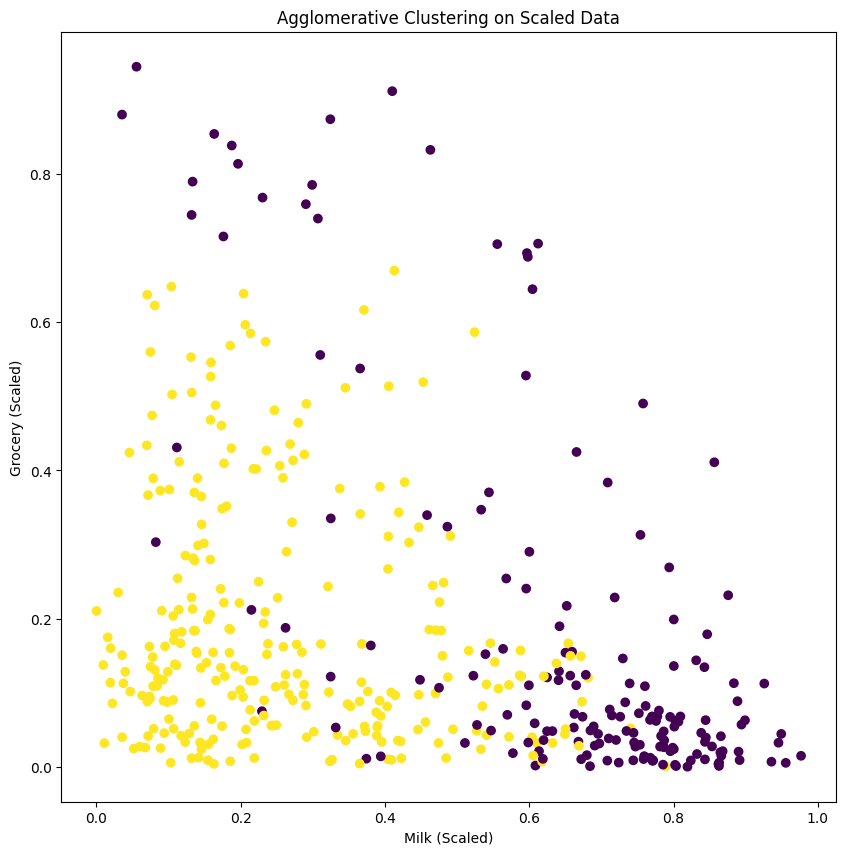

In [26]:
y=cluster.fit_predict(data_scaled)
cluster.labels_
plt.figure(figsize=(10,10))
plt.scatter(data_scaled['Grocery'],data_scaled['Frozen'],c=y)
plt.title('Agglomerative Clustering on Scaled Data')
plt.xlabel('Milk (Scaled)')
plt.ylabel('Grocery (Scaled)')

## PCA(Principle Component Analysis)

In [28]:
import pandas as pd
data=pd.read_csv('/content/IRIS.csv')
data.head(2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [29]:
x=data.drop('species',axis=1)
y=data.species

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)


In [31]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
xtrain1=sd.fit_transform(xtrain)
xtest1=sd.fit_transform(xtest)


In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) # here in dataset 4 cols,we make it to 2 through PCA
xtrain2=pca.fit_transform(xtrain1)
xtest2=pca.fit_transform(xtest1)
pca.explained_variance_ratio_

array([0.76134513, 0.17546402])

The explained_variance_ratio_ attribute provides the proportion of the dataset's variance that lies along each principal component. In this case, you will get two values since you have reduced the dimensionality to 2.

In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain2,ytrain)
ypred=model.predict(xtest2)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.26666666666666666

In [35]:
xtrain2

array([[ 1.27228206e+00,  3.57878727e-01],
       [ 1.52231770e-01, -2.99835283e-01],
       [-2.18764183e+00,  6.17154256e-01],
       [ 9.41913396e-01,  1.21810481e-02],
       [ 1.76227837e+00, -2.71066387e-01],
       [-8.16806401e-02, -1.04319475e+00],
       [-1.89794863e+00,  1.48464927e+00],
       [ 9.59395493e-01, -6.91087802e-01],
       [ 3.65661204e-01, -9.13013087e-02],
       [ 2.31845912e-01, -1.01891237e+00],
       [ 1.79730127e+00,  3.25092688e-01],
       [-2.40350676e+00, -2.44874760e-01],
       [ 1.82199968e+00,  5.93295049e-01],
       [-1.98427118e+00,  5.55515137e-01],
       [-2.17073306e+00,  1.13527621e+00],
       [-2.55598076e-01, -2.67039928e+00],
       [ 1.38862320e+00,  1.82768524e-01],
       [ 1.93409268e+00,  9.57133382e-01],
       [ 1.12243099e+00, -1.78242941e+00],
       [ 1.88169499e+00, -8.17365689e-01],
       [ 5.43123767e-02, -1.32586239e+00],
       [ 2.70365641e+00,  7.16489102e-01],
       [ 6.91516012e-01,  7.35561284e-01],
       [ 1.